# Введение

## Цель проекта:
- Изучить различные варианты построения линейных графиков с помощью библиотеки Seaborn.
- Для примеров использован реальный датасет о зарплатах специалистов в сфере Data Science.
- Проект показывает, как выбирать и настраивать линейные графики для анализа трендов.



## Описание данных
[Data Science Salaries 2023 💸](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)

Датасет отображает динамику зарплат в Data Science в разных странах, для разных должностей и типов компаний в период с 2020 по 2023 год. Эти данные подходят для демонстрации линейных графиков, так как они показывают изменения и тренды во времени.

## Основные столбцы:

work_year — Год выплаты зарплаты.

experience_level — Уровень опыта специалиста.

employment_type — Формат занятости.

job_title — Название должности.

salary — Общая сумма заработной платы (в оригинальной валюте).

salary_currency — Валюта зарплаты.

salary_in_usd — Зарплата в долларах США (приведенная к единой валюте).

employee_residence — Страна проживания сотрудника.

remote_ratio — Доля удалённой работы (%).

company_location — Страна расположения компании.

company_size — Размер компании (по количеству сотрудников).

## План работы над проектом
1. Импорт библиотек и подготовка окружения

Подключение необходимых библиотек: pandas, seaborn, matplotlib.

2. Загрузка и обзор данных

- Импорт датасета.

- Краткий обзор структуры данных (head(), info()).

- Проверка на пропуски.

3. Анализ и визуализация данных (линейные графики)

3.1. Простые линейные графики

- Использование базового графика с одной линией (sns.lineplot()).

3.2. Сравнительные графики (группировка)

- Динамика зарплат по странам.

- Динамика зарплат по уровням опыта.

- Добавление легенды, цвета, маркеров (hue, style).

3.3. Варианты оформления графиков

- Добавление заголовков, подписей осей.

- Изменение стилей линий и маркеров.

- Настройка палитры цветов.

4. Итоги проекта
- Итоговый вывод по использованию линейных графиков для анализа трендов.

# Импорт библиотек и подготовка окружения

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Загрузка данных

In [ ]:
df = pd.read_csv('ds_salaries.csv')

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


Данные загружены, пропусков нет, так что можем начинать строить графики!





# Простой линейный график

Начнем с создания самого обычного графика. Построим соотношение между годом и зарплатой в долларах.

- `data = df` обозначаем откуда мы будем брать данные.
- `x='work_year'` по оси x откладываем год.
- `y='salary_in_usd'`по оси у откладываем значение зарплаты.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='work_year', ylabel='salary_in_usd'>

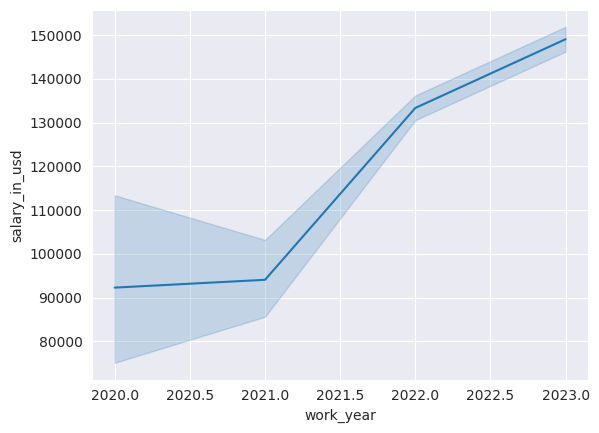

In [ ]:
sns.set_style('darkgrid')
sns.lineplot(data = df, x='work_year', y='salary_in_usd')

Из данного графика мы видим, что с 2020 года по 2023 год зп в сфере наук  данных уверено растёт. Особенно сильный рост произошёл с 2020 года на 2021.

# Сравнительные графики (группировка)

## Динамика зарплат по уровням опыта.


Добавим дополнительный параметр `hue = 'experience_level'`. Мы получим 4 линейных графика для каждой категории из `experience_level`

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

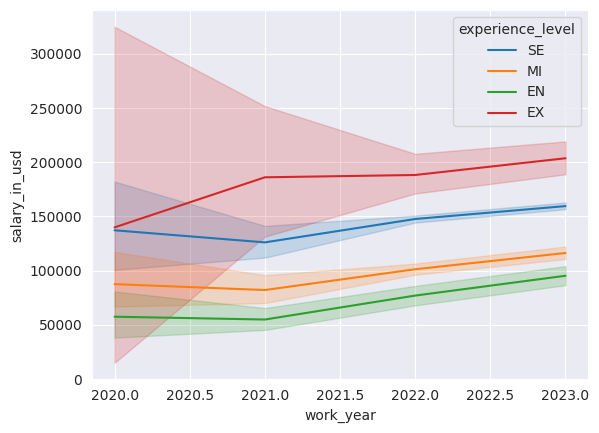

In [66]:
sns.set_style('darkgrid')
sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'experience_level')

Изменим в показанных выше графиках стиль линий. Для этого добавим параметр
`style='experience_level'`

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

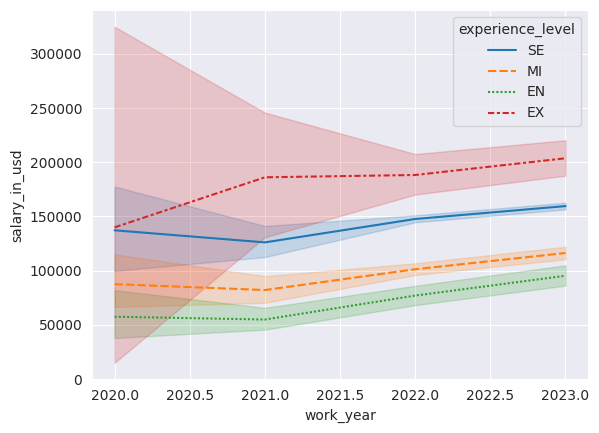

In [67]:
sns.set_style('darkgrid')
sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'experience_level', style='experience_level')

Теперь добавим маркеры, чтобы было лучше видно точки пересечения. Для этого воспользуемся параметром
`markers = True`

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

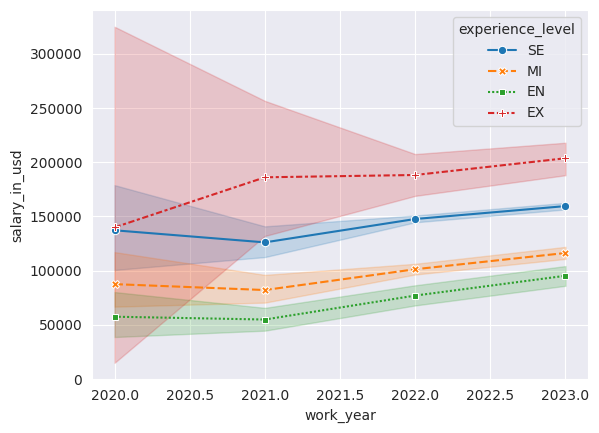

In [68]:
sns.set_style('darkgrid')
sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'experience_level', style='experience_level', markers = True)

Данный график показывает вполне логичный результат: чем выше твой уровень, тем выше твоя зарплата. При этом разница между зп EN и MI становиться довольно маленькой, а вот разница между MI и SE продолжает оставаться примерно на одном уровне.

## Динамика зарплат по странам.


У нас есть данные о месте, в котором расположена компания, но значений слиiком много и просто указать `hue='company_location'` будет неправильно, ведь график перестанет быть читаемым. Давайте постоим графики для двух интересующих нас локаций: Америки и Евросоюза. Добавим параметр `color='код числа в HEX'`, чтобы было проще понять где какой график.

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

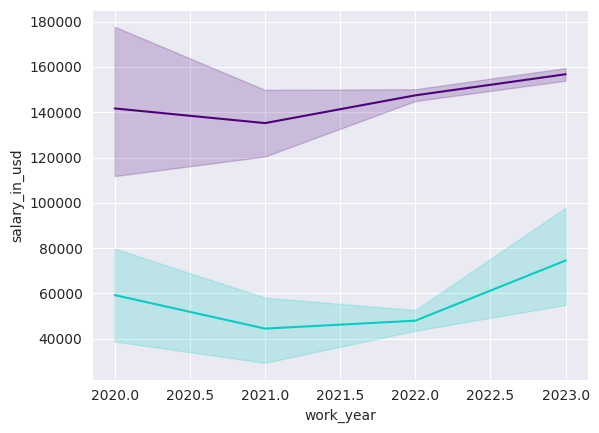

In [69]:
sns.set_style('darkgrid')

sns.lineplot(data = df[df['company_location']=='ES'], x='work_year', y='salary_in_usd', color='#05cdc2')

sns.lineplot(data = df[df['company_location']=='US'], x='work_year', y='salary_in_usd', color='#4d027a')

Из этого графика мы узнали, что если хочется побольше "деняг", то следует искать работу в US.

# Варианты оформления графиков

В этот раз будем работать с графиком о размере компании и зп работников. Постараемся сделать этот график наиболее карисивым с точки зрения оформления.





<Axes: xlabel='work_year', ylabel='salary_in_usd'>

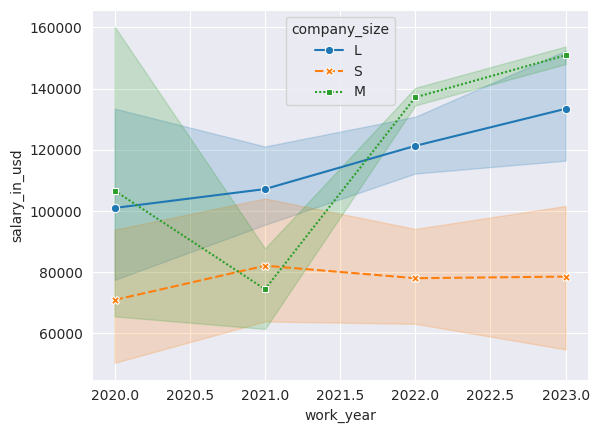

In [70]:
sns.set_style('darkgrid')
sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'company_size', style='company_size', markers = True)


Для начала изменим цветовую гамму. Для этого используем параметр `palette=['#02C9AF', '#049CE4', '#FE00EC']` или же заранее создадим массив с набором классных цветов и уже его передадим в `palette=my_palette`

Сама цветовая палитра взята [отсюда](https://color.romanuke.com/czvetovaya-palitra-4436/), там много чего красивого есть:)

In [32]:
my_palette = ['#02C9AF', '#049CE4', '#FE00EC', '#2B4F8D', '#011034']

/tmp/ipython-input-71-1454840954.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'company_size', style='company_size', markers = True, palette=my_palette)


<Axes: xlabel='work_year', ylabel='salary_in_usd'>

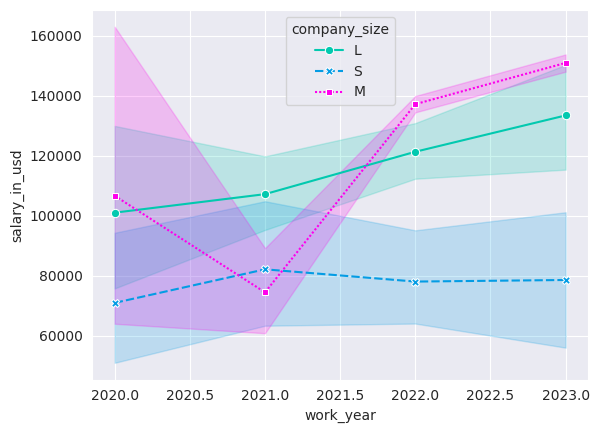

In [71]:
sns.set_style('darkgrid')
sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'company_size', style='company_size', markers = True, palette=my_palette)


Теперь сделаем так, чтобы все маркеры были одинаковыми. Для этого используем `markers='*'`

/tmp/ipython-input-72-1690609620.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'company_size', style='company_size', markers = '*', palette=my_palette)
/tmp/ipython-input-72-1690609620.py:2: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'company_size', style='company_size', markers = '*', palette=my_palette)


<Axes: xlabel='work_year', ylabel='salary_in_usd'>

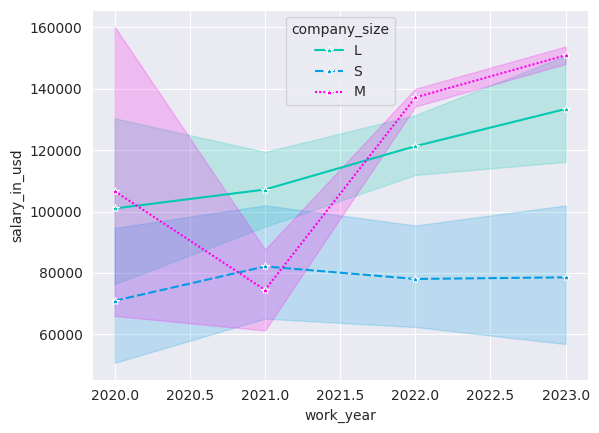

In [72]:
sns.set_style('darkgrid')
sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'company_size', style='company_size', markers = '*', palette=my_palette)


Теперь оформим наш график: сделаем заголовок, удобные подписи по осей. Здесь мы уже воспользуемся библиотекой **matplotlib**

- plt.xlabel('Год') - меняем название оси x
- plt.ylabel('ЗП работника в $') -  меняем название оси y
- plt.legend(title = 'Размер компании') - даём понятное название для легенды
- plt.title('ЗП работника в зависимости от размера компании') - даём название всему графику

/tmp/ipython-input-73-1440343717.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'company_size', style='company_size', markers = True, palette=my_palette)


<function matplotlib.pyplot.show(close=None, block=None)>

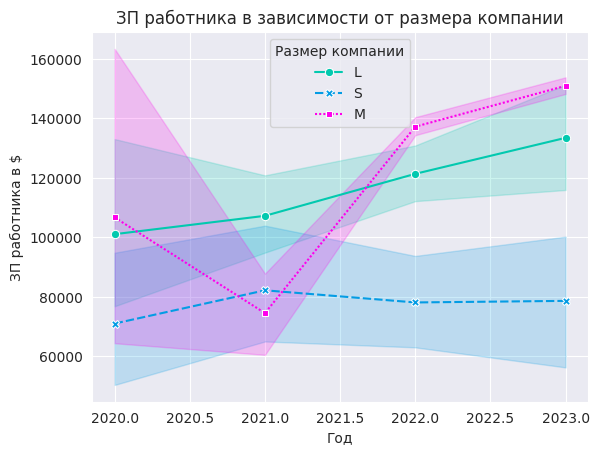

In [73]:
sns.set_style('darkgrid')
sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'company_size', style='company_size', markers = True, palette=my_palette)


plt.xlabel('Год')
plt.ylabel('ЗП работника в $')
plt.legend(title = 'Размер компании')
plt.title('ЗП работника в зависимости от размера компании')

plt.show

Теперерь настроим размер нашего графика
- `plt.figure(figsize=(4,6))`
И сдеалем наклон для обозначений по оси x
- `plt.xticks(rotation=45)`

/tmp/ipython-input-74-2043808293.py:5: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'company_size', style='company_size', markers = True, palette=my_palette)


<function matplotlib.pyplot.show(close=None, block=None)>

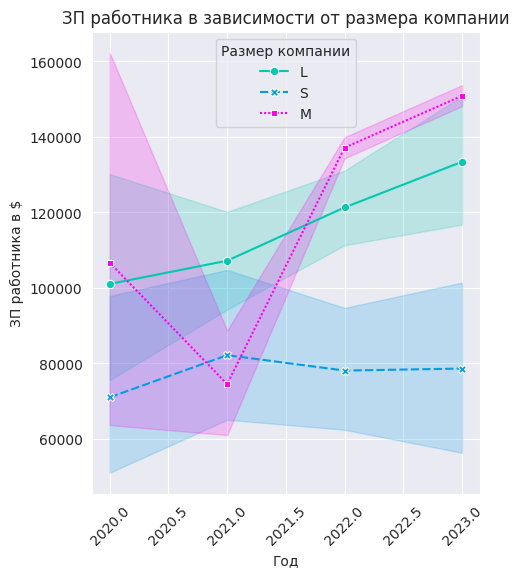

In [74]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,6))


sns.lineplot(data = df, x='work_year', y='salary_in_usd', hue = 'company_size', style='company_size', markers = True, palette=my_palette)

plt.xticks(rotation=45)
plt.xlabel('Год')
plt.ylabel('ЗП работника в $')
plt.legend(title = 'Размер компании')
plt.title('ЗП работника в зависимости от размера компании')

plt.show

Данный красивый график нам показывает, что лучше всего работать в большой компании. Самые маленькие компании имеют меньше зп, а в средних зп скачет.

# Итоги проекта

В рамках этого проекта мы:

Освоили построение простых линейных графиков с использованием библиотеки Seaborn.

Научились отображать несколько трендов одновременно на одном графике, используя параметры hue и style.

Изучили возможности оформления графиков — настройку цветов, маркеров, подписей и заголовков.

Получили представление о динамике зарплат в сфере Data Science: видно, что в большинстве стран и на разных уровнях опыта зарплаты постепенно растут.

**Вывод**: навыки визуализации — важная часть анализа данных. Графики позволяют увидеть тренды, которые не всегда очевидны в таблицах. А растущие зарплаты — отличный стимул продолжать учиться и развиваться в этой области!